In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [34]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.manifold import TSNE
from umap import umap_

In [35]:
data = pd.read_csv('Football Stadiums.csv', encoding_errors='ignore')

data

,S.No,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC
0,1,UEFA,Stadiumi Beslidhja,Lezh,Beslidhja,7000,Albania,ALB
1,2,UEFA,Stadiumi Flamurtari,Vlor,Flamurtari Vlor,8200,Albania,ALB
2,3,UEFA,Stadiumi Lai,Lai,KF Lai,5000,Albania,ALB
3,4,UEFA,Stadiumi Niko Dovana,Durrs,Teuta,12040,Albania,ALB
4,5,UEFA,Stadiumi Selman Strmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB
...,...,...,...,...,...,...,...,...
1815,1816,UEFA,Cardiff City Stadium,Cardiff,Cardiff City,32898,Wales,WAL
1816,1817,UEFA,Liberty Stadium,Swansea,Swansea City,21088,Wales,WAL
1817,1818,UEFA,Parc y Scarlets,Llanelli,"Scarlets, Llanelli RFC",14870,Wales,WAL
1818,1819,UEFA,Park Avenue,Aberystwyth,Aberystwyth Town,5000,Wales,WAL


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.No           1820 non-null   int64 
 1   Confederation  1820 non-null   object
 2   Stadium        1820 non-null   object
 3   City           1820 non-null   object
 4   HomeTeams      1820 non-null   object
 5   Capacity       1820 non-null   int64 
 6   Country        1820 non-null   object
 7   IOC            1820 non-null   object
dtypes: int64(2), object(6)
memory usage: 113.9+ KB


In [37]:
data.head()

,S.No,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC
0,1,UEFA,Stadiumi Beslidhja,Lezh,Beslidhja,7000,Albania,ALB
1,2,UEFA,Stadiumi Flamurtari,Vlor,Flamurtari Vlor,8200,Albania,ALB
2,3,UEFA,Stadiumi Lai,Lai,KF Lai,5000,Albania,ALB
3,4,UEFA,Stadiumi Niko Dovana,Durrs,Teuta,12040,Albania,ALB
4,5,UEFA,Stadiumi Selman Strmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB


In [38]:
fig = px.bar(data, x='Confederation', y='Capacity', color='Capacity')
fig.update_traces(marker_line_color='black', marker_line_width=0.2)
fig.update_layout(title='Вместительность стадионов футбольных ассоциаций', title_font_size=20, title_x=0.5)
fig.show()

In [39]:
fig.update_xaxes(title_text='Футбольная ассоциация', title_font_size=16)
fig.update_yaxes(title_text='Вместительность', title_font_size=16)
fig.update_xaxes(tickangle=315)
fig.update_xaxes(tickfont_size=14)
fig.update_layout(width=None, height=700)
fig.update_xaxes(gridwidth=2, gridcolor='ivory')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

In [40]:
fig_pie = px.pie(data, values='Capacity', names='Confederation')
fig_pie.update_layout(width=None, height=700)
fig_pie.update_xaxes(title_text='Марка автомобиля', title_font_size=16)
fig_pie.update_yaxes(title_text='Цена', title_font_size=16)
fig_pie.update_xaxes(tickangle=315)
fig_pie.update_traces(marker_line_color='black', marker_line_width=2)
fig_pie.update_layout(title='Сумма проданных автомобилей за 2023г', title_font_size=20, title_x=0.5)
fig_pie.update_xaxes(tickfont_size=14)
fig_pie.update_xaxes(gridwidth=2, gridcolor='ivory')
fig_pie.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig_pie.show()

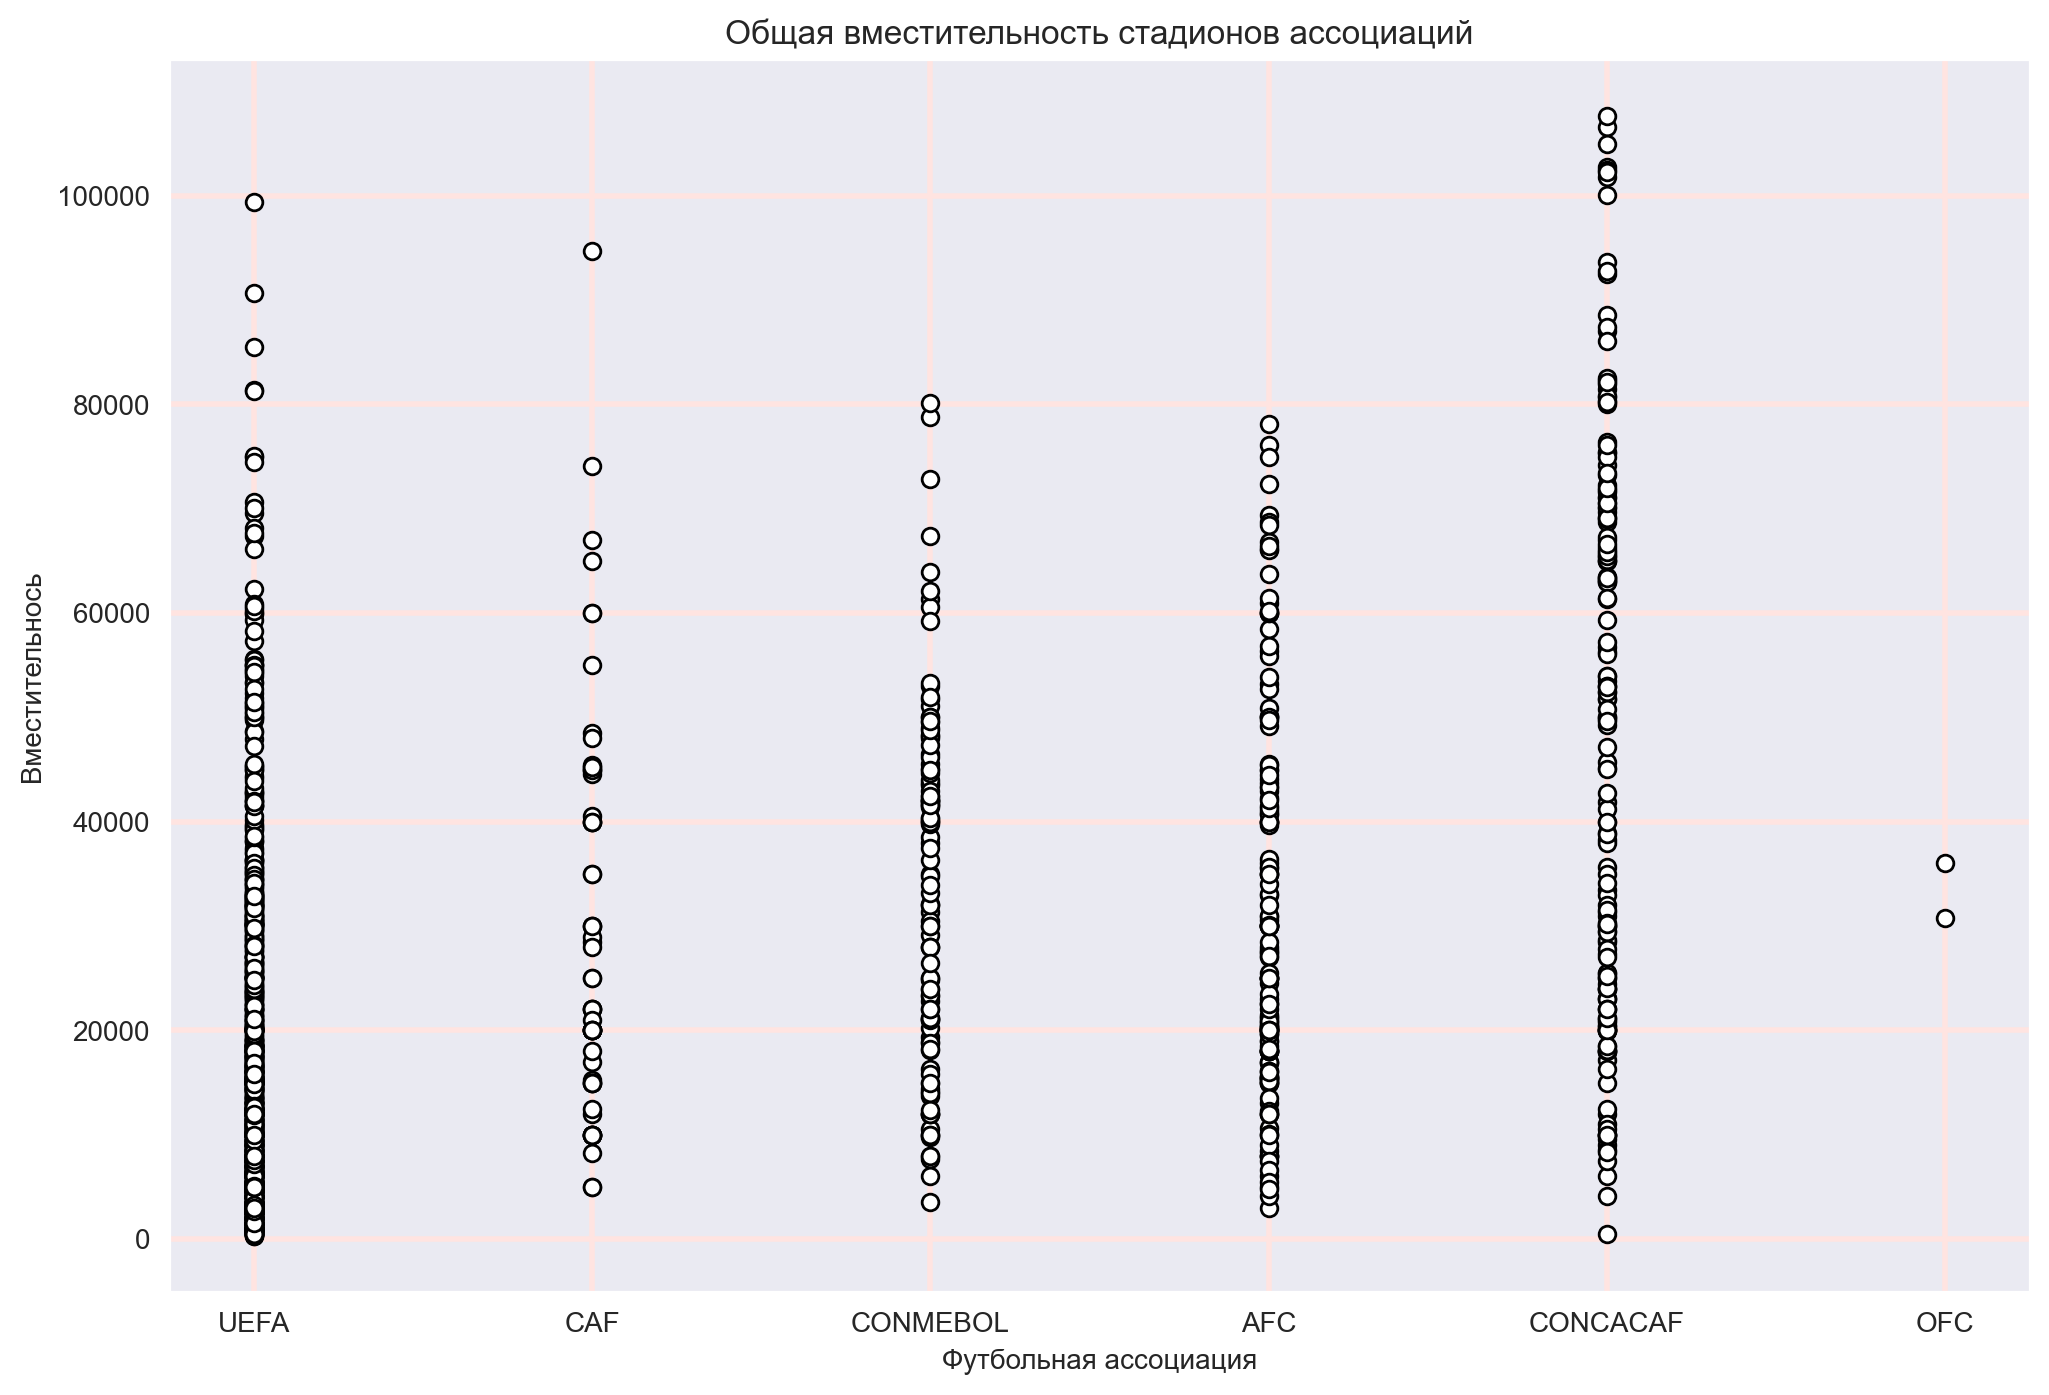

In [41]:
x = data.Confederation
y = data.Capacity
plt.figure(figsize=(12, 8), dpi=200)
params = {'lines.marker': '.',
          'lines.markerfacecolor': 'white',
          'lines.markeredgecolor': 'black'}
plt.rcParams.update(params)
plt.title('Общая вместительность стадионов ассоциаций')
plt.xlabel('Футбольная ассоциация')
plt.ylabel('Вместительнось')
plt.plot(x, y, marker='o', color='crimson', linestyle='')
plt.grid(linewidth=2, color='mistyrose')
plt.show()

In [42]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [43]:
data = pd.read_csv('Football Stadiums.csv', encoding_errors='ignore')
df = data.drop(['Confederation', 'IOC'], axis=1).copy()

In [44]:
for i in df:
    df[f'{i}'] = pd.factorize(df[f'{i}'])[0]
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
sc = preprocessing.MinMaxScaler()
df

,S.No,Stadium,City,HomeTeams,Capacity,Country
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000550,0.000557,0.000690,0.000612,0.000818,0.0
2,0.001100,0.001115,0.001380,0.001224,0.001637,0.0
3,0.001649,0.001672,0.002070,0.001836,0.002455,0.0
4,0.002199,0.002230,0.002761,0.002448,0.003273,0.0
...,...,...,...,...,...,...
1815,0.997801,0.997770,0.997239,0.997552,0.998363,1.0
1816,0.998351,0.998328,0.997930,0.998164,0.999182,1.0
1817,0.998900,0.998885,0.998620,0.998776,1.000000,1.0
1818,0.999450,0.999443,0.999310,0.999388,0.001637,1.0


In [45]:
T = TSNE(n_components=2, perplexity=25, random_state=123)

In [46]:
TSNE_features = T.fit_transform(df)

In [47]:
TSNE_features[1:4,:]

array([[-61.73937 ,   9.048449],
       [-61.978622,   9.329733],
       [-61.631584,   9.11091 ]], dtype=float32)

In [48]:
DATA = df.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

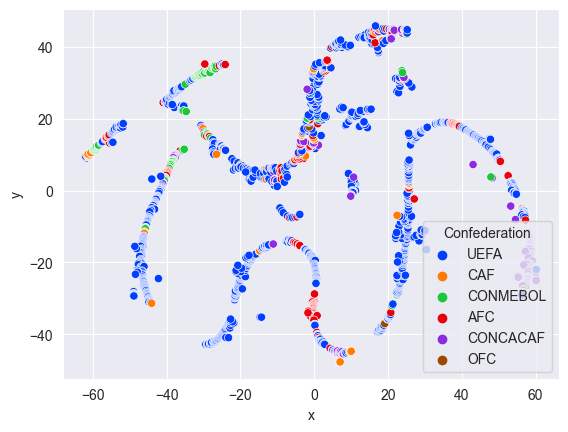

In [49]:
fig = plt.figure()
sns.scatterplot(x='x',y='y',hue=data['Confederation'], data=DATA, palette='bright')
plt.show()

In [50]:
T = TSNE(n_components=2, perplexity=5, random_state=123)
TSNE_features = T.fit_transform(df)
TSNE_features[1:4,:]

array([[-98.837746, -39.622383],
       [-98.7226  , -39.34728 ],
       [-98.59317 , -39.02648 ]], dtype=float32)

In [51]:
DATA = df.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

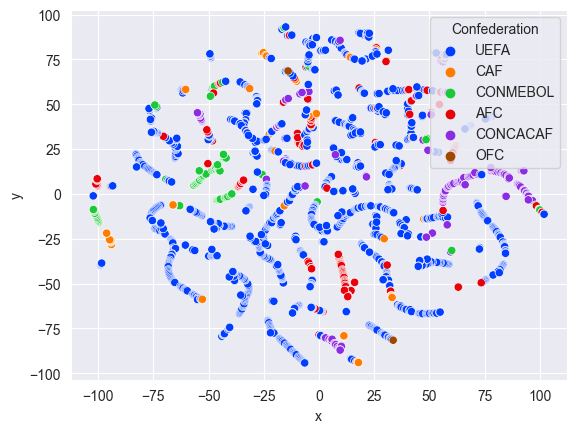

In [52]:
fig = plt.figure()
sns.scatterplot(x='x',y='y',hue=data['Confederation'], data=DATA, palette='bright')
plt.show()

In [53]:
T = TSNE(n_components=2, perplexity=50, random_state=123)
TSNE_features = T.fit_transform(df)
TSNE_features[1:4,:]

array([[-32.841965,  29.833197],
       [-32.83003 ,  29.807749],
       [-33.161736,  29.695467]], dtype=float32)

In [54]:
DATA = df.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:14

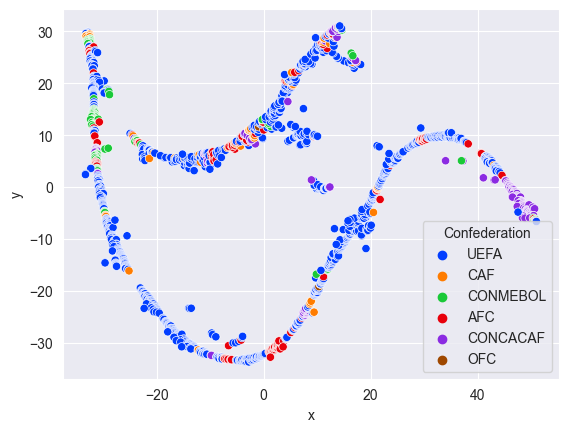

In [55]:
fig = plt.figure()
sns.scatterplot(x='x',y='y',hue=data['Confederation'], data=DATA, palette='bright')
plt.show()

In [80]:
data = pd.read_csv('Football Stadiums.csv', encoding_errors='ignore')
df = data.drop(['Confederation', 'IOC'], axis=1)
color_df =data.Confederation

KeyError: 'UEFA'

In [71]:
for i in df:
    df[f'{i}'] = pd.factorize(df[f'{i}'])[0]
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
sc = preprocessing.MinMaxScaler()
df

,S.No,Stadium,City,HomeTeams,Capacity,Country
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000550,0.000557,0.000690,0.000612,0.000818,0.0
2,0.001100,0.001115,0.001380,0.001224,0.001637,0.0
3,0.001649,0.001672,0.002070,0.001836,0.002455,0.0
4,0.002199,0.002230,0.002761,0.002448,0.003273,0.0
...,...,...,...,...,...,...
1815,0.997801,0.997770,0.997239,0.997552,0.998363,1.0
1816,0.998351,0.998328,0.997930,0.998164,0.999182,1.0
1817,0.998900,0.998885,0.998620,0.998776,1.000000,1.0
1818,0.999450,0.999443,0.999310,0.999388,0.001637,1.0


In [72]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

In [73]:
um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = (umap_.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(df))

AttributeError: module 'umap' has no attribute 'UMAP'

In [74]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = dict()

# Создайте словарь um с результатами UMAP для разных значений n_neighbors и min_dist
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = umap_.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(df)


C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: Use

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       UEFA
1       UEFA
2       UEFA
3       UEFA
4       UEFA
        ... 
1815    UEFA
1816    UEFA
1817    UEFA
1818    UEFA
1819    UEFA
Name: Confederation, Length: 1820, dtype: object

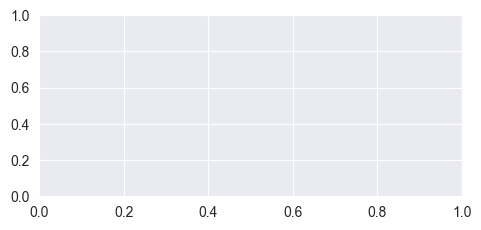

In [75]:
plt.figure(figsize=(12, 8))

for i in range(len(n_n)):
    for j in range(len(m_d)):
        plt.subplot(len(n_n), len(m_d), i * len(m_d) + j + 1)
        plt.scatter(um[(n_n[i], m_d[j])][:, 0], um[(n_n[i], m_d[j])][:, 1], c=data['Confederation'], cmap='viridis')
        plt.title(f'n_neighbors={n_n[i]}, min_dist={m_d[j]}')
        plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
um

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\umap\umap_.py:1943: Use

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       UEFA
1       UEFA
2       UEFA
3       UEFA
4       UEFA
        ... 
1815    UEFA
1816    UEFA
1817    UEFA
1818    UEFA
1819    UEFA
Name: Confederation, Length: 1820, dtype: object

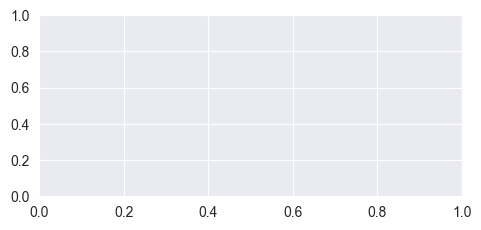

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('Football Stadiums.csv', encoding_errors='ignore')
df = data.drop(['Confederation', 'IOC'], axis=1)

# Факторизация категориальных признаков
for i in df:
    df[f'{i}'] = pd.factorize(df[f'{i}'])[0]

# Масштабирование данных
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = dict()

# Создайте словарь um с результатами UMAP для разных значений n_neighbors и min_dist
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])] = umap_.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(df)

# Создайте графики для каждой комбинации параметров
plt.figure(figsize=(12, 8))

for i in range(len(n_n)):
    for j in range(len(m_d)):
        plt.subplot(len(n_n), len(m_d), i * len(m_d) + j + 1)
        plt.scatter(um[(n_n[i], m_d[j])][:, 0], um[(n_n[i], m_d[j])][:, 1],c=data['Confederation'], cmap='viridis',marker='o')
        plt.title(f'n_neighbors={n_n[i]}, min_dist={m_d[j]}')

plt.tight_layout()
plt.show()
